In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load the dataset
df = pd.read_csv('earthquake_data_tsunami.csv')

# Define independent and dependent variables
independent_vars = ['magnitude', 'sig', 'depth']
dependent_var = 'tsunami'

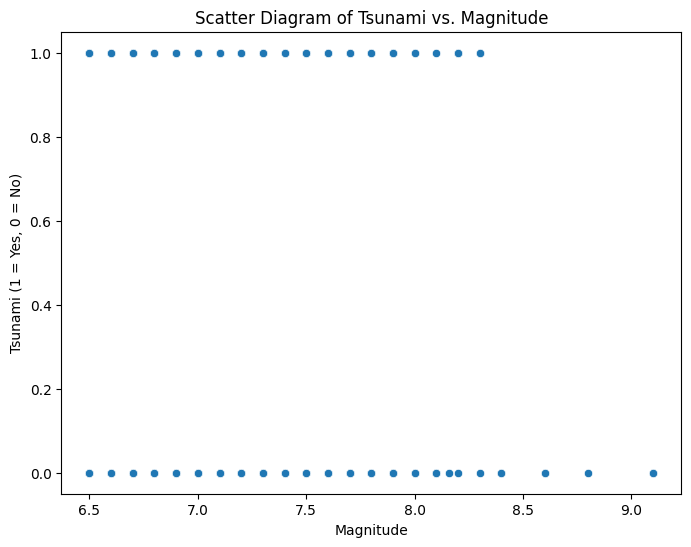

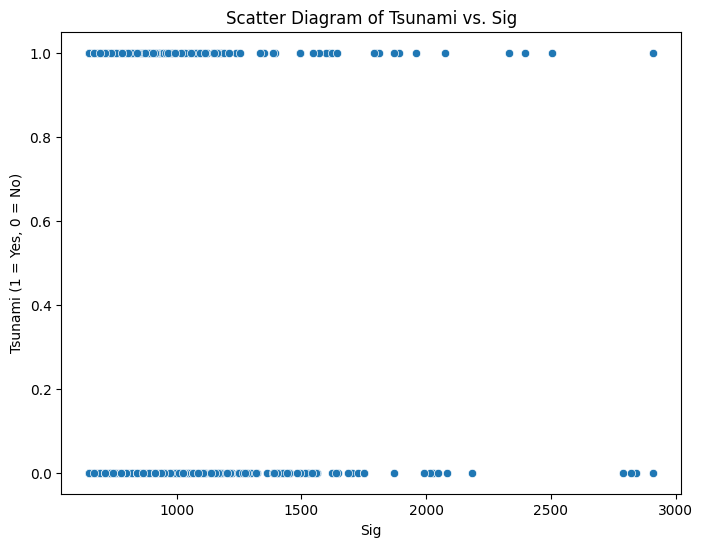

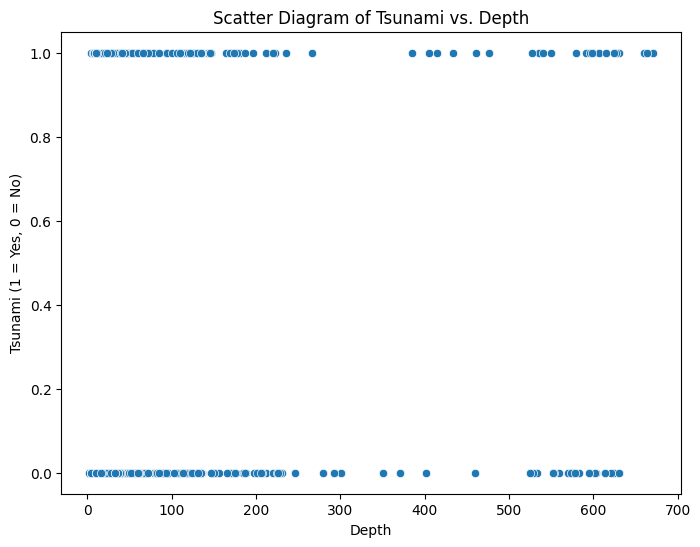

In [11]:
# --- Create Scatter Diagrams ---
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y=dependent_var)
    plt.title(f'Scatter Diagram of Tsunami vs. {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Tsunami (1 = Yes, 0 = No)')
    plt.savefig(f'scatter_{var}_vs_tsunami.png')
    plt.show()  # Display the plot in the notebook
    plt.close()

In [12]:

# --- Build Regression Models ---

# Model 1: Three independent variables
X1 = df[['magnitude', 'sig', 'depth']]
y = df[dependent_var]
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

# Model 2: Two independent variables (magnitude, sig)
X2 = df[['magnitude', 'sig']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# Model 3: Two independent variables (magnitude, depth)
X3 = df[['magnitude', 'depth']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

# Model 4: Two independent variables (sig, depth)
X4 = df[['sig', 'depth']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4).fit()

# --- Compare Models ---
print("Model 1: Tsunami vs. Magnitude, Sig, Depth")
print(model1.summary())
print("\n" + "="*50 + "\n")

print("Model 2: Tsunami vs. Magnitude, Sig")
print(model2.summary())
print("\n" + "="*50 + "\n")

print("Model 3: Tsunami vs. Magnitude, Depth")
print(model3.summary())
print("\n" + "="*50 + "\n")

print("Model 4: Tsunami vs. Sig, Depth")
print(model4.summary())
print("\n" + "="*50 + "\n")


Model 1: Tsunami vs. Magnitude, Sig, Depth
                            OLS Regression Results                            
Dep. Variable:                tsunami   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8690
Date:                Wed, 15 Oct 2025   Prob (F-statistic):              0.457
Time:                        12:22:54   Log-Likelihood:                -546.41
No. Observations:                 782   AIC:                             1101.
Df Residuals:                     778   BIC:                             1119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [13]:

# --- Forecasting ---
new_data = pd.DataFrame({
    'const': [1],
    'magnitude': [8.0],
    'sig': [1500],
    'depth': [50.0]
})

In [14]:
# Identify the best model based on Adjusted R-squared
adj_r_squared_values = {
    "Model 1": model1.rsquared_adj,
    "Model 2": model2.rsquared_adj,
    "Model 3": model3.rsquared_adj,
    "Model 4": model4.rsquared_adj,
}

best_model_name = max(adj_r_squared_values, key=adj_r_squared_values.get)
best_model = None
if best_model_name == "Model 1":
    best_model = model1
    new_data = new_data[['const', 'magnitude', 'sig', 'depth']]
elif best_model_name == "Model 2":
    best_model = model2
    new_data = new_data[['const', 'magnitude', 'sig']]
elif best_model_name == "Model 3":
    best_model = model3
    new_data = new_data[['const', 'magnitude', 'depth']]
else:
    best_model = model4
    new_data = new_data[['const', 'sig', 'depth']]



In [15]:

# Perform prediction
prediction = best_model.predict(new_data)

print(f"The best model is: {best_model_name} with an Adjusted R-squared of {adj_r_squared_values[best_model_name]:.4f}")
print(f"\nForecasting with the best model for the new data point:\n{new_data.to_string(index=False)}")
print(f"\nPredicted tsunami probability: {prediction.iloc[0]:.4f}")

The best model is: Model 4 with an Adjusted R-squared of 0.0008

Forecasting with the best model for the new data point:
 const  sig  depth
     1 1500   50.0

Predicted tsunami probability: 0.3736
